<a href="https://colab.research.google.com/github/febin-p-george/CODSOFT/blob/main/MoviesRatingPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.shape

(15509, 10)

In [ ]:
data.dropna(inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
data.drop_duplicates(subset='Name',inplace=True)
data.shape

(5385, 10)

In [ ]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
data['Duration']=data['Duration'].str.extract('(\d+)').astype(float)
data['Duration']

1        109.0
3        110.0
5        147.0
6        142.0
8         82.0
         ...  
15493    115.0
15494    153.0
15503    125.0
15505    129.0
15508    130.0
Name: Duration, Length: 5385, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
GenNum=label_encoder.fit_transform(data['Genre'])
GenNum

array([226, 182, 155, ...,  27,  37,  37])

In [ ]:
GenNum.max()

369

In [ ]:
DirNum=label_encoder.fit_transform(data['Director'])
DirNum

array([ 621, 1317, 1508, ..., 1766, 1009,  882])

In [ ]:
DirNum.max()

2388

In [ ]:
Act1Num=label_encoder.fit_transform(data['Actor 1'])
Act1Num

array([1319, 1169,  369, ...,  395,  109,  456])

In [ ]:
Act1Num.max()

1915

In [ ]:
Act2Num=label_encoder.fit_transform(data['Actor 2'])
Act2Num

array([2227,  706,   72, ...,  741, 2122,  740])

In [ ]:
Act2Num.max()

2275

In [ ]:
Act3Num=label_encoder.fit_transform(data['Actor 3'])
Act3Num

array([ 314, 2101, 2001, ..., 1644,  309,  298])

In [ ]:
Act3Num.max()

2494

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

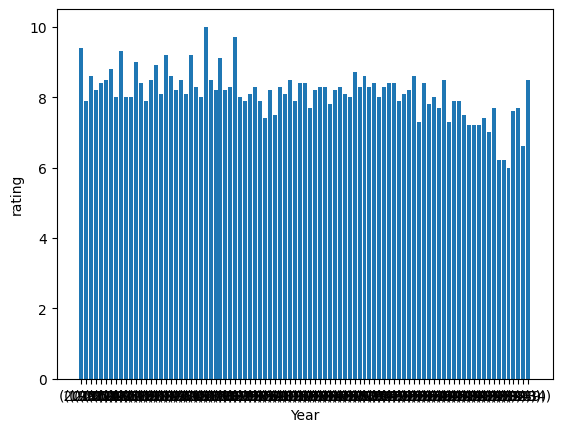

In [ ]:
plt.bar(data['Year'],data['Rating'])
plt.xlabel('Year')
plt.ylabel('rating')
plt.plot

<function matplotlib.pyplot.show(close=None, block=None)>

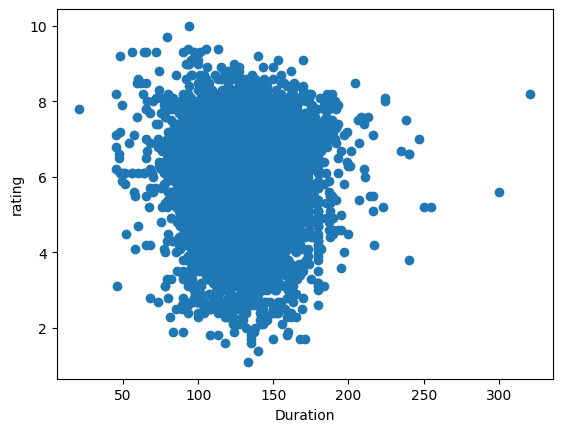

In [ ]:
plt.scatter(data['Duration'],data['Rating'])
plt.xlabel('Duration')
plt.ylabel('rating')
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
new_data = {
            }
df=pd.DataFrame(new_data)
df['Genre']=GenNum
df['Director']=DirNum
df['Actor1']=Act1Num
df['Actor2']=Act2Num
df['Actor3']=Act3Num
df['Year']=data['Year']
df['Duration']=data['Duration']
df['Rating']=data['Rating']
df['Votes']=data['Votes']
df

,Genre,Director,Actor1,Actor2,Actor3,Year,Duration,Rating,Votes
0,226,621,1319,2227,314,NaN,NaN,NaN,NaN
1,182,1317,1169,706,2101,(2019),109.0,7.0,8
2,155,1508,369,72,2001,NaN,NaN,NaN,NaN
3,285,2014,675,1093,2464,(2019),110.0,4.4,35
4,315,134,1891,1155,995,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5380,226,1206,1823,1767,1576,(2020),118.0,4.3,"1,208"
5381,131,2027,745,1589,1159,NaN,NaN,NaN,NaN
5382,27,1766,395,741,1644,(2000),134.0,5.3,"1,754"
5383,37,1009,109,2122,309,NaN,NaN,NaN,NaN


In [ ]:
df['Year'] = df['Year'].str.replace(r'[()]', '')
df

<ipython-input-177-41cbbe34e59e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace(r'[()]', '')


,Genre,Director,Actor1,Actor2,Actor3,Year,Duration,Rating,Votes
0,226,621,1319,2227,314,NaN,NaN,NaN,NaN
1,182,1317,1169,706,2101,2019,109.0,7.0,8
2,155,1508,369,72,2001,NaN,NaN,NaN,NaN
3,285,2014,675,1093,2464,2019,110.0,4.4,35
4,315,134,1891,1155,995,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5380,226,1206,1823,1767,1576,2020,118.0,4.3,"1,208"
5381,131,2027,745,1589,1159,NaN,NaN,NaN,NaN
5382,27,1766,395,741,1644,2000,134.0,5.3,"1,754"
5383,37,1009,109,2122,309,NaN,NaN,NaN,NaN


In [ ]:
df['Votes'] = df['Votes'].astype(str)
df

,Genre,Director,Actor1,Actor2,Actor3,Year,Duration,Rating,Votes
0,226,621,1319,2227,314,NaN,NaN,NaN,nan
1,182,1317,1169,706,2101,2019,109.0,7.0,8.0
2,155,1508,369,72,2001,NaN,NaN,NaN,nan
3,285,2014,675,1093,2464,2019,110.0,4.4,35.0
4,315,134,1891,1155,995,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...
5380,226,1206,1823,1767,1576,2020,118.0,4.3,1208.0
5381,131,2027,745,1589,1159,NaN,NaN,NaN,nan
5382,27,1766,395,741,1644,2000,134.0,5.3,1754.0
5383,37,1009,109,2122,309,NaN,NaN,NaN,nan


In [ ]:
df1=df.dropna()
df1

,Genre,Director,Actor1,Actor2,Actor3,Year,Duration,Rating,Votes
1,182,1317,1169,706,2101,2019,109.0,7.0,8.0
3,285,2014,675,1093,2464,2019,110.0,4.4,35.0
5,36,397,294,556,470,1997,147.0,4.7,827.0
6,226,1067,1321,613,355,2005,142.0,7.4,1086.0
8,318,1354,627,973,847,2012,82.0,5.6,326.0
...,...,...,...,...,...,...,...,...,...
5372,149,2386,598,548,29,1982,156.0,5.4,28.0
5374,291,2204,1409,607,1640,1986,139.0,7.3,42.0
5375,226,2119,1695,1101,1213,1990,125.0,5.8,314.0
5380,226,1206,1823,1767,1576,2020,118.0,4.3,1208.0


In [ ]:
df1['Votes'] = df1['Votes'].str.replace(',', '').astype(float)

<ipython-input-213-3b403ead8655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Votes'] = df1['Votes'].str.replace(',', '').astype(float)


In [ ]:
x=df1.drop(columns=['Rating'],axis=1)
x.shape

(1904, 8)

In [ ]:
y=df1['Rating']
y.shape

(1904,)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest,ypred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Squared Error: 1.73
R-squared: 0.13


In [ ]:
prediction=model.predict([[182,1317,1169,706,2101,2019,109.0,8.0]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.52497471])